<a href="https://colab.research.google.com/github/souvikjana9993/ImageClassification/blob/master/MachineHack_imageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install fastai

In [0]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
import gdown
!gdown https://drive.google.com/uc?id=1ccCC-lOOrXbbxXa_M_Tfowz5GFlgrhRB

Downloading...
From: https://drive.google.com/uc?id=1ccCC-lOOrXbbxXa_M_Tfowz5GFlgrhRB
To: /content/Cats_and_Dogs_Datasets.zip
54.9MB [00:00, 151MB/s] 


In [0]:
!unzip Cats_and_Dogs_Datasets.zip

In [0]:
import os
import pandas as pd

train = pd.read_csv('train.csv', index_col='id')
train.head()

,class_name,breed
id,,
img_1313,1,11
img_0642,2,21
img_1450,1,11
img_2201,1,12
img_0964,2,21


In [0]:
labels = list(train['breed'].unique())
labels

[11, 21, 12, 14, 22, 23, 25, 24, 15, 13]

In [0]:
for w in labels:
    os.makedirs('/content/imagebylabels/'+ str(w))
#from time import sleep
for image in train.index:
    folder = train.loc[image, 'breed']
    #print(image)
    old = '/content/images_train/{}.jpg'.format(image)
    new = '/content/imagebylabels/{}/{}.jpg'.format(folder,image)
    try:
        os.rename(old, new)
    except:
        print('{} - {}'.format(str(image),folder))

In [0]:
# for w in labels:
#     os.makedirs('/content/data/test/'+ str(w))
# #from time import sleep
for image in train.index:
    folder = train.loc[image, 'breed']
    #print(image)
    old = '/content/data/test/{}.jpg'.format(image)
    new = '/content/data/test/{}/{}.jpg'.format(folder,image)
    try:
        os.rename(old, new)
    except:
        print('{} - {}'.format(str(image),folder))

In [0]:
torch.cuda.is_available()

True

In [0]:
!mkdir data

In [0]:
os.rename('/content/imagebylabels','/content/train')

In [0]:
os.rename('/content/images_test','/content/test')

In [0]:
shutil.move('/content/train','/content/data')

'/content/data/train'

In [0]:
shutil.move('/content/test','/content/data')

'/content/data/test'

In [0]:
PATH = '/content/data/'

In [0]:
!mkdir valid

In [0]:
shutil.move('/content/valid','/content/data')

'/content/data/valid'

In [0]:
for w in labels:
    os.makedirs('/content/data/valid/'+ str(w))

In [0]:
os.listdir(PATH)

['train', 'test']

In [0]:
fnames = np.array([f'train/{f}' for f in sorted(os.listdir(f'{PATH}train'))])

In [0]:
shutil.rmtree('/content/data/test')

In [0]:
bs = 64 # batch size
img_size = 224 # image size

In [98]:
path = Path('/content/data')
path.ls()

[PosixPath('/content/data/models'),
 PosixPath('/content/data/valid'),
 PosixPath('/content/data/train')]

In [0]:
data = ImageDataBunch.from_folder(path,train='train',valid='valid', size=img_size, bs = bs,valid_pct=0.2) 

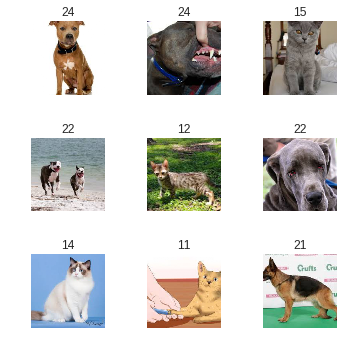

In [100]:
data.show_batch(rows=3, figsize=(5,5))

In [103]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:06<00:00, 16507608.77it/s]


In [104]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.616588,0.335188,0.110156
2,0.347981,0.313120,0.101558
3,0.210793,0.308302,0.096722
4,0.128683,0.297892,0.090274


In [0]:
learn.save('stage-1_resnet50') # saving the model weights

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

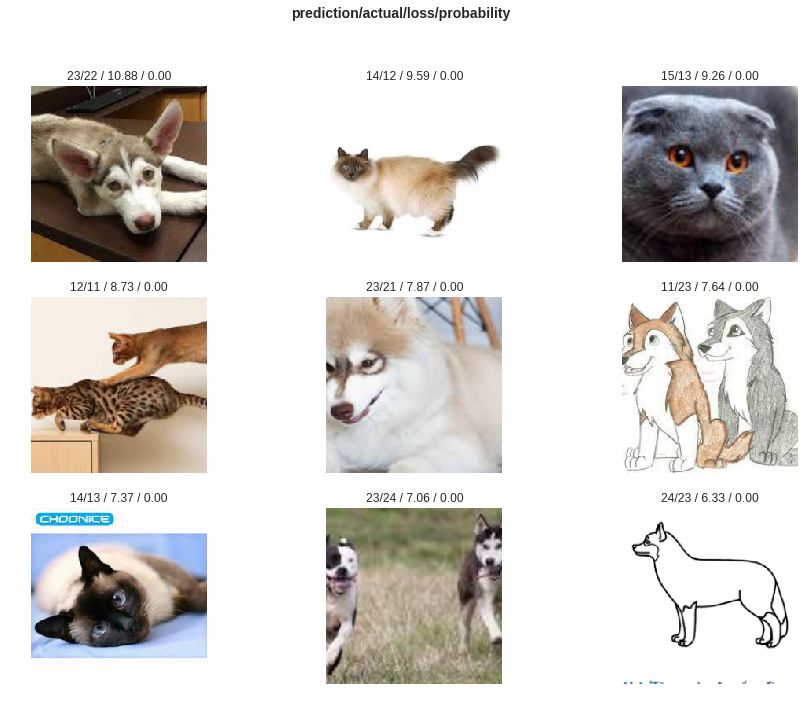

In [107]:
interp.plot_top_losses(9, figsize=(15,11))

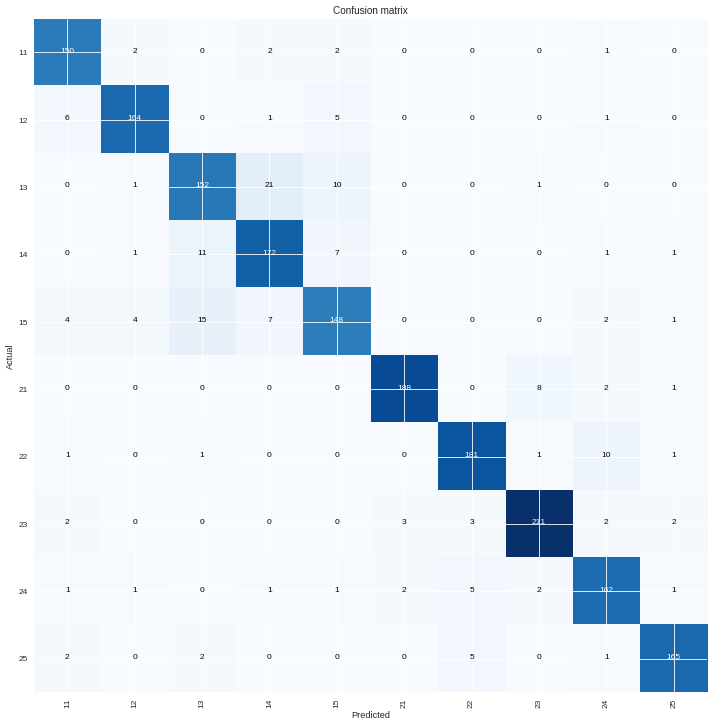

In [108]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [109]:
interp.most_confused(min_val=2)

[('13', '14', 21),
 ('15', '13', 15),
 ('14', '13', 11),
 ('13', '15', 10),
 ('22', '24', 10),
 ('21', '23', 8),
 ('14', '15', 7),
 ('15', '14', 7),
 ('12', '11', 6),
 ('12', '15', 5),
 ('24', '22', 5),
 ('25', '22', 5),
 ('15', '11', 4),
 ('15', '12', 4),
 ('23', '21', 3),
 ('23', '22', 3)]

# unfreeze and train

In [0]:
learn.unfreeze()

In [112]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.438328,0.377689,0.112843


In [0]:
learn.load('stage-1_resnet50');

In [114]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


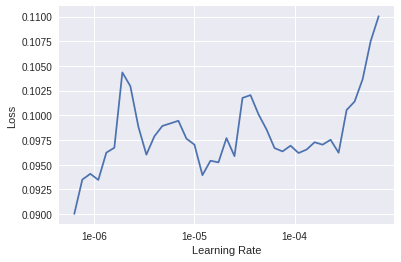

In [115]:
learn.recorder.plot()

In [117]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-7,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.033004,0.299447,0.087587
2,0.030439,0.294351,0.084363
3,0.023485,0.298032,0.085975
4,0.018931,0.299293,0.084363


In [0]:
learn.save('stage-1-resnet50-withlearningrate')